In [102]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import pulp
import importlib
import matplotlib.pyplot as plt

In [103]:
import GGM_sampler
import GGM_inference
import GGM_diagnostics
import J_sampler
import J_inference
import J_diagnostics

In [104]:
importlib.reload(GGM_inference)
importlib.reload(GGM_diagnostics)
importlib.reload(GGM_sampler)
importlib.reload(J_inference)
importlib.reload(J_diagnostics)
importlib.reload(J_sampler)

<module 'J_sampler' from '/Users/lucaraffo/Desktop/final/J_sampler.py'>

In [105]:
n_spins = 10
n_samples = 100

In [106]:
J_precision = GGM_sampler.precision_maker(n_spins, seed = 9)

In [107]:
samples = GGM_sampler.precision_sampler_sign(J_precision, n_samples)

In [108]:
histogram = J_sampler._samples_to_histogram(samples)

In [117]:
J_hat, _ = J_inference.inverse_ising("EMHT", 0.1, "Y", histogram, n_steps = 300)

λ = 0.02757  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9


In [118]:
J_hat[0]

array([-0.4478961 , -0.91227543, -0.01958713, -0.41021514,  0.37773398,
        0.13154665,  0.03731053,  0.08240356,  0.87400454, -0.46772036],
      dtype=float32)

In [144]:
mask_J = J_diagnostics.mask(J_precision * (1 - jnp.eye(n_spins)), 0.4)

In [145]:
mask_hat = J_diagnostics.mask(J_hat * (1 - jnp.eye(n_spins)), 0.4)

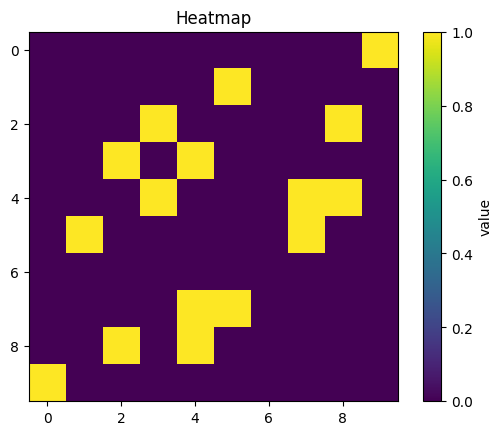

In [146]:
plt.imshow(mask_J, cmap="viridis", interpolation="nearest", vmin=0.0, vmax=1.0)
plt.colorbar(label="value")
plt.title("Heatmap")
plt.show()

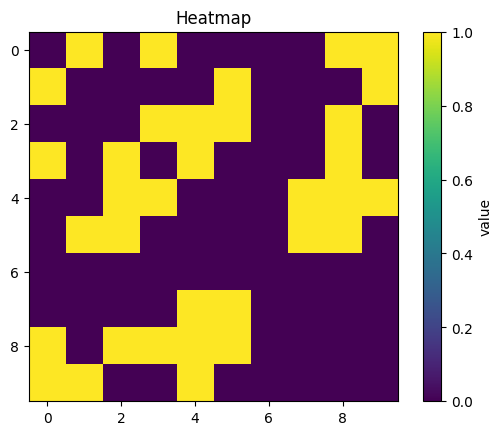

In [147]:
plt.imshow(mask_hat, cmap="viridis", interpolation="nearest", vmin=0.0, vmax=1.0)
plt.colorbar(label="value")
plt.title("Heatmap")
plt.show()

In [149]:
fpr, tpr, auc_roc, recall, precision, auc_prc, pr_baseline = J_diagnostics.roc_prc(J_precision * (1 - jnp.eye(n_spins)), J_hat)

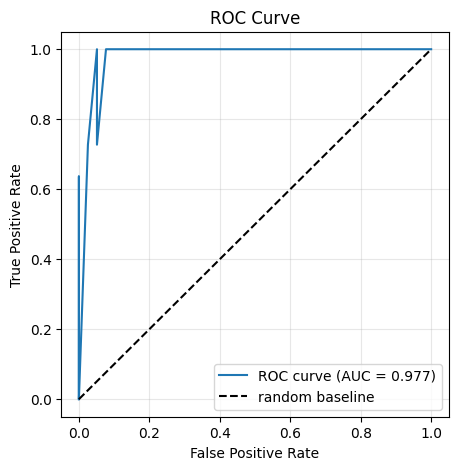

In [154]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_roc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="random baseline")  # diagonale
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(recall, precision, label=f"PRC (AUC = {auc_prc:.3f})")
plt.hlines(pr_baseline, 0, 1, colors="k", linestyles="--", label="PR baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
